In [349]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from keras.preprocessing.image import *
from keras.layers import *
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

In [195]:
fashion_mnist=keras.datasets.fashion_mnist
(trainImages,trainLabels),(testImages,testLabels)=fashion_mnist.load_data()

In [196]:
classNames=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [197]:
trainImages.shape
trainLabels.shape
testImages.shape
testLabels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

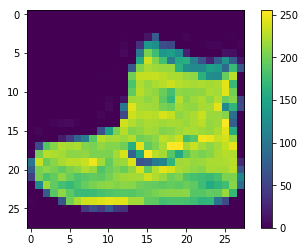

9

In [198]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.show()
trainLabels[0]

In [199]:
trainImages=trainImages/255.0
testImages=testImages/255.0

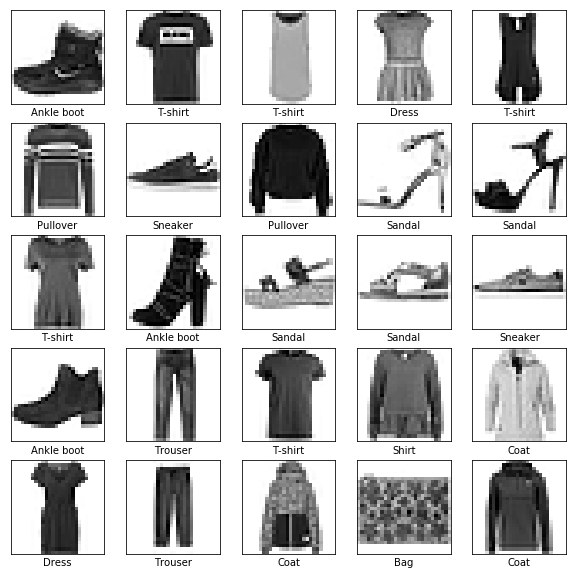

In [200]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainImages[i],cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [201]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [202]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [203]:
history=model.fit(trainImages, trainLabels, epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.5851 - accuracy: 0.8017
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4181 - accuracy: 0.8540
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.3804 - accuracy: 0.8666
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3523 - accuracy: 0.8752
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3339 - accuracy: 0.8809
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3198 - accuracy: 0.8851
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3036 - accuracy: 0.8904
Epoch 8/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2956 - accuracy: 0.8937
Epoch 9/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2842 - accuracy: 0.8959
Epoch 10/10
60000/60000 [==============================

In [204]:
testLoss, testAcc=model.evaluate(testImages,testLabels)
print(testAcc)

10000/10000 [==============================] - 1s 63us/step
0.8755000233650208


In [205]:
preLabels=model.predict(testImages)

nan

In [336]:
wrong_list=[]
for i in range(len(preLabels)):
    if testLabels[i]==np.argmax(preLabels[i]):
        wrong_list.append(np.nan)
    else:
        wrong_list.append(np.argmax(preLabels[i]))

In [236]:
l0=np.zeros(10)
l1=np.zeros(10)
l2=np.zeros(10)
l3=np.zeros(10)
l4=np.zeros(10)
l5=np.zeros(10)
l6=np.zeros(10)
l7=np.zeros(10)
l8=np.zeros(10)
l9=np.zeros(10)
label_dict={0:l0,1:l1,2:l2,3:l3,4:l4,5:l5,6:l6,7:l7,8:l8,9:l9}

In [237]:
label_dict[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [298]:
print(np.argmax(preLabels[1]))
print(testLabels[1])
classNames[6]

2
2


'Shirt'

In [238]:
for i in range(len(preLabels)):
    pre_ans=np.argmax(preLabels[i])
    if pre_ans != testLabels[i]:
        label_dict[pre_ans][testLabels[i]]+=1

In [305]:
label_dict

{0: array([  0.,   3.,  19.,  15.,   0.,   0., 137.,   0.,   3.,   0.]),
 1: array([1., 0., 0., 3., 1., 0., 0., 0., 0., 0.]),
 2: array([15.,  0.,  0.,  7., 62.,  0., 92.,  0.,  5.,  0.]),
 3: array([63., 25., 25.,  0., 66.,  1., 59.,  0.,  7.,  0.]),
 4: array([  5.,   5., 131.,  12.,   0.,   0., 111.,   0.,   4.,   0.]),
 5: array([ 3.,  0.,  0.,  0.,  0.,  0.,  0., 26.,  1., 15.]),
 6: array([73.,  2., 46., 14., 47.,  0.,  0.,  0.,  1.,  2.]),
 7: array([ 0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  4., 26.]),
 8: array([ 8.,  2.,  3.,  4.,  3.,  2., 14.,  1.,  0.,  0.]),
 9: array([ 0.,  0.,  0.,  0.,  0., 10.,  0., 41.,  0.,  0.])}

In [344]:
max=0
label_name=0
cnt=0
for i in range(len(label_dict)):
    cnt=np.argmax(label_dict[i])
    if max<cnt:
        max=label_dict[i][cnt]
        label_name=i
num=np.argmax(label_dict[label_name])
wrong_ans=classNames[num]
print("%s를 예측헀을때 %s가 %d번 오답으로 나옴" %(classNames[label_name],wrong_ans,max))

# T-shirt를 예측헀을때 Shirt가 137번 오답으로 나옴

T-shirt를 예측헀을때 Shirt가 137번 오답으로 나옴


In [354]:
df=pd.DataFrame(wrong_list)
df=df[df[0].notnull()].astype('int')
wrong_index=df[df[0]==num].index

In [369]:
print_img_index=[]
cnt=0
while(cnt<10):
    a=random.choice(wrong_index)
    if a not in print_img_index:
        print_img_index.append(a)
        cnt+=1

In [381]:
print_img_index
preLabels.shape

(10000, 10)

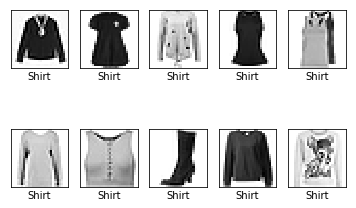

In [386]:
for i in range(10):
    img_index=print_img_index[i]
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testImages[img_index],cmap=plt.cm.binary)
    plt.xlabel(classNames[np.argmax(preLabels[img_index])])
plt.show()

In [109]:
xTrain,xVal,yTrain,yVal=train_test_split(trainImages, trainLabels, test_size=0.3, random_state=777)

In [112]:
print(xTrain.shape) # 42000, 28, 28
print(xVal.shape) # 18000, 28, 28
print(yTrain.shape) # 42000,
print(yVal.shape) # 18000,

(42000, 28, 28)
(18000, 28, 28)
(42000,)
(18000,)


In [113]:
xTrain=xTrain.reshape(-1,28,28,1)
xVal=xVal.reshape(-1,28,28,1)
yTrain=to_categorical(yTrain)
yVal=to_categorical(yVal)

In [157]:
testImages=testImages.reshape(-1,28,28,1)
testLabels=to_categorical(testLabels)

In [114]:
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_CHANNEL=1

In [115]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(BatchNormalization()) # 배치정규화
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [126]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[['accuracy','mse']])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)         

In [127]:
es=EarlyStopping(monitor='val_loss', patience=10)

In [128]:
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.5,
    min_lr=0.00001,
    verbose=1
)

In [129]:
callbacks=[es,learning_rate_reduction]

In [130]:
history=model.fit(xTrain, yTrain, epochs=30, batch_size=200, validation_data=(xVal,yVal),callbacks=callbacks)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 59s 1ms/step - loss: 0.4259 - accuracy: 0.8458 - mse: 0.0219 - val_loss: 0.3514 - val_accuracy: 0.8727 - val_mse: 0.0184
Epoch 2/30
42000/42000 [==============================] - 58s 1ms/step - loss: 0.3937 - accuracy: 0.8562 - mse: 0.0204 - val_loss: 0.3193 - val_accuracy: 0.8825 - val_mse: 0.0169
Epoch 3/30
42000/42000 [==============================] - 61s 1ms/step - loss: 0.3706 - accuracy: 0.8640 - mse: 0.0193 - val_loss: 0.3418 - val_accuracy: 0.8698 - val_mse: 0.0184
Epoch 4/30
42000/42000 [==============================] - 60s 1ms/step - loss: 0.3537 - accuracy: 0.8694 - mse: 0.0185 - val_loss: 0.3050 - val_accuracy: 0.8855 - val_mse: 0.0161
Epoch 5/30
42000/42000 [==============================] - 61s 1ms/step - loss: 0.3409 - accuracy: 0.8738 - mse: 0.0179 - val_loss: 0.2994 - val_accuracy: 0.8881 - val_mse: 0.0159
Epoch 6/30
42000/42000 [==============================]

In [131]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
mse=history.history['mse']
val_mse=history.history['val_mse']

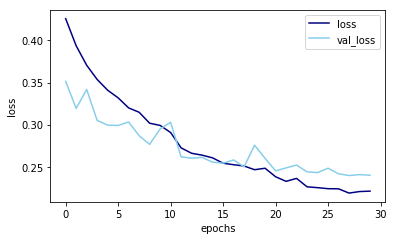

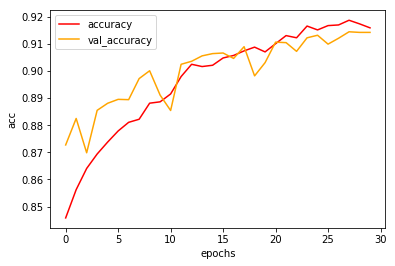

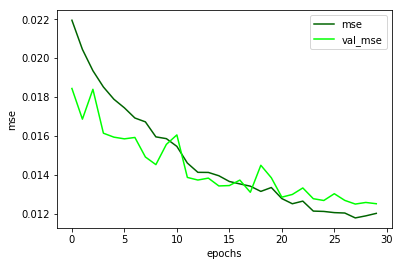

In [387]:
plt.figure(figsize=(6,12))
plt.subplot(3,1,3)
plt.plot(loss, 'navy', label='loss')
plt.plot(val_loss, 'skyblue', label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.plot(acc, 'red', label='accuracy')
plt.plot(val_acc, 'orange', label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()
plt.plot(mse, 'darkgreen', label='mse')
plt.plot(val_mse, 'lime', label='val_mse')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

In [159]:
eval_history=model.evaluate(testImages, testLabels)

10000/10000 [==============================] - 6s 617us/step
.2d 0.26345443749427794


In [176]:
print("test모델의 loss:%.4f, acc:%.4f, mse:%.4f"%(eval_history[0],eval_history[1],eval_history[2]))

test모델의 loss:0.2635, acc:0.9097, mse:0.0134


In [256]:
import pandas as pd

In [254]:
import json 
path='C:/Users/student/Downloads/데이터들/planesnet/planesnet'
data=json.load(open(path+'/planesnet.json'))

In [258]:
df=pd.DataFrame(data)

In [260]:
df.head()

,data,labels,locations,scene_ids
0,"[206, 195, 187, 183, 177, 175, 174, 193, 198, ...",1,"[-118.40497658522878, 33.940618514147936]",20170620_175442_0e30
1,"[215, 209, 200, 196, 192, 197, 205, 168, 155, ...",1,"[-122.392469714, 37.6176425378]",20161212_180859_0e30
2,"[204, 214, 220, 219, 213, 205, 198, 193, 199, ...",1,"[-122.397578597, 37.6209247852]",20170524_181349_0e2f
3,"[179, 174, 179, 178, 173, 170, 168, 168, 168, ...",1,"[-122.214849831, 37.7203378331]",20161110_180707_0e1f
4,"[222, 222, 218, 214, 208, 205, 207, 206, 206, ...",1,"[-117.862173435, 33.6796854072]",20160813_184932_0c64


In [282]:
len(df.data[0]) # 1200 줄
df.labels.value_counts() # 0 24000,1 8000

0    24000
1     8000
Name: labels, dtype: int64